In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [3]:
df = pd.read_csv('city_day.csv')

In [4]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

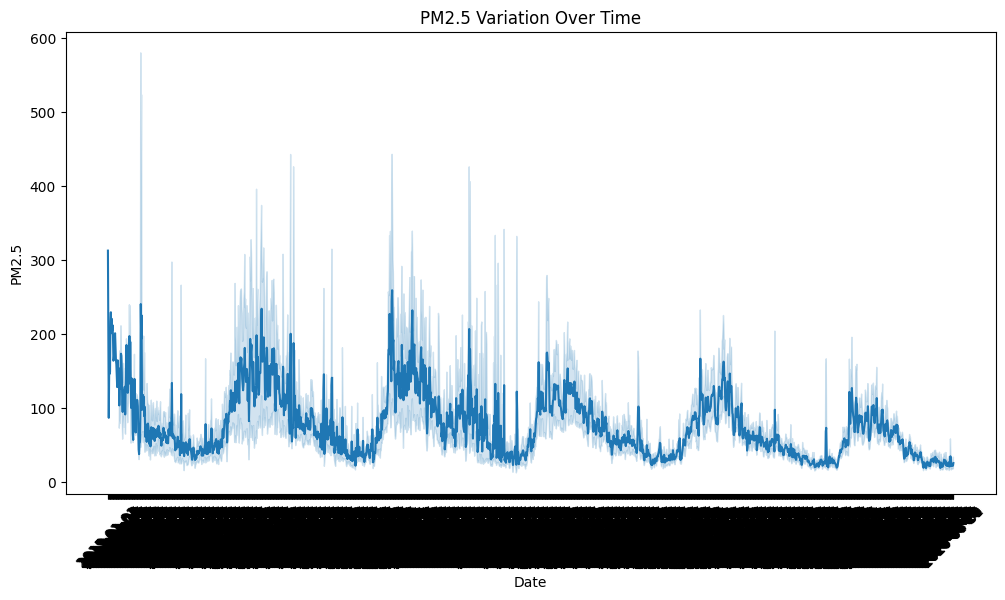

In [8]:
# Line plot for PM2.5 over Date
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='PM2.5', data=df)
plt.title('PM2.5 Variation Over Time')
plt.xticks(rotation=45)
plt.show()


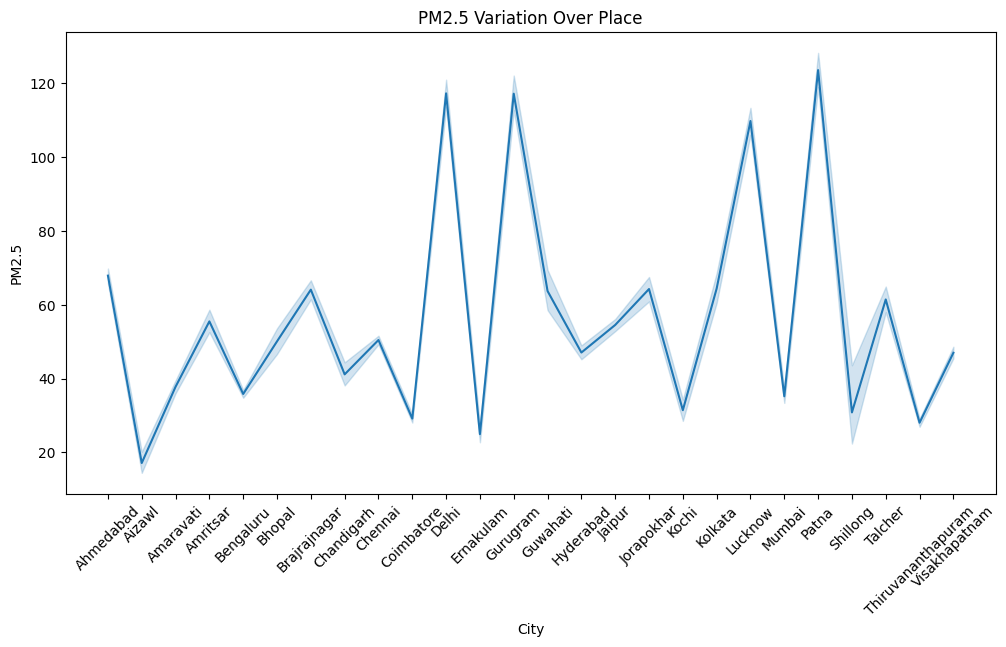

In [9]:
# Line plot for PM2.5 over Date
plt.figure(figsize=(12, 6))
sns.lineplot(x='City', y='PM2.5', data=df)
plt.title('PM2.5 Variation Over Place')
plt.xticks(rotation=45)
plt.show()


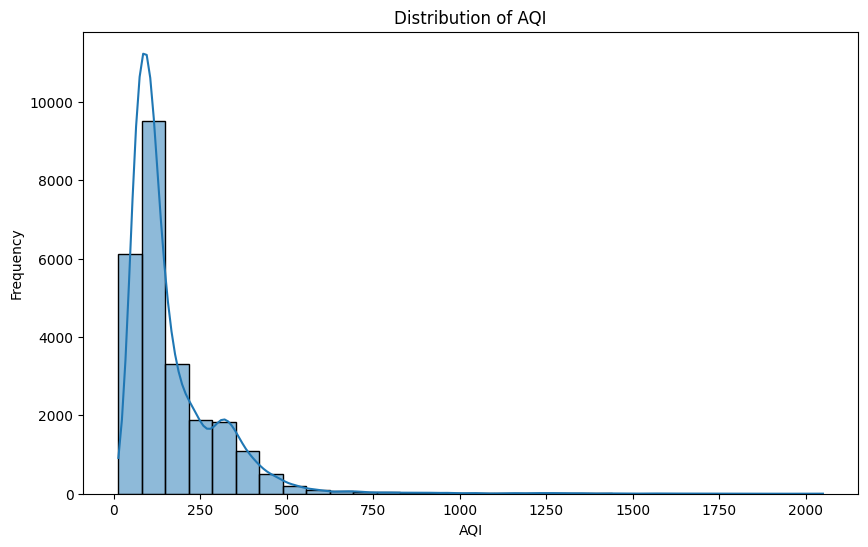

In [10]:
# Histogram for AQI
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'].dropna(), bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

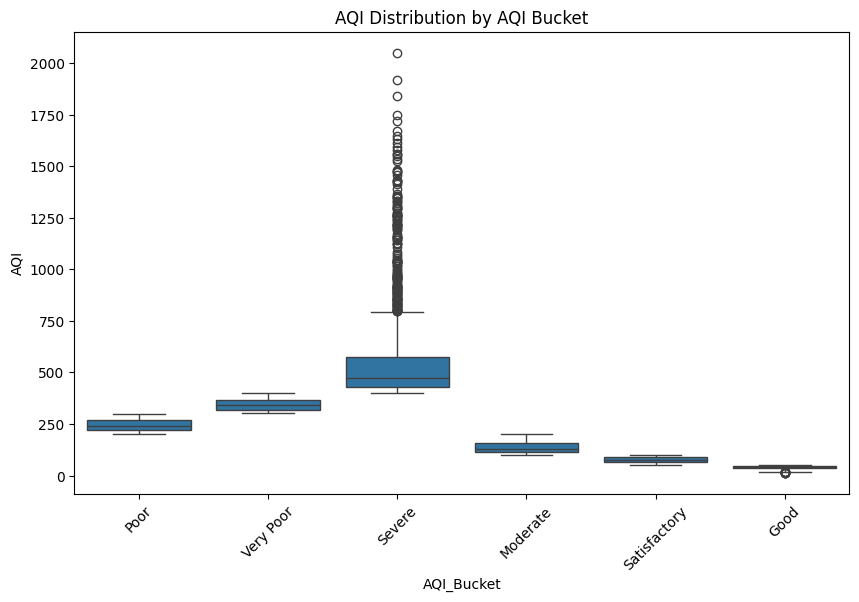

In [11]:
# Boxplot for AQI by AQI_Bucket
plt.figure(figsize=(10, 6))
sns.boxplot(x='AQI_Bucket', y='AQI', data=df)
plt.title('AQI Distribution by AQI Bucket')
plt.xticks(rotation=45)
plt.show()


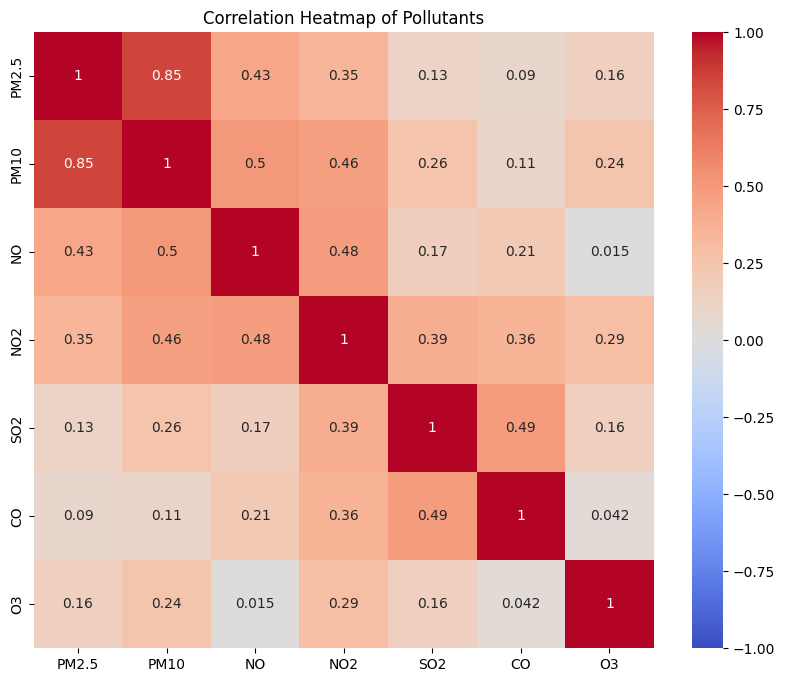

In [12]:
# Correlation heatmap of pollutants
pollutant_corr = df[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'O3']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(pollutant_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


<ipython-input-13-763410b3c2b9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_benzene_by_city.values, y=avg_benzene_by_city.index, palette='viridis')


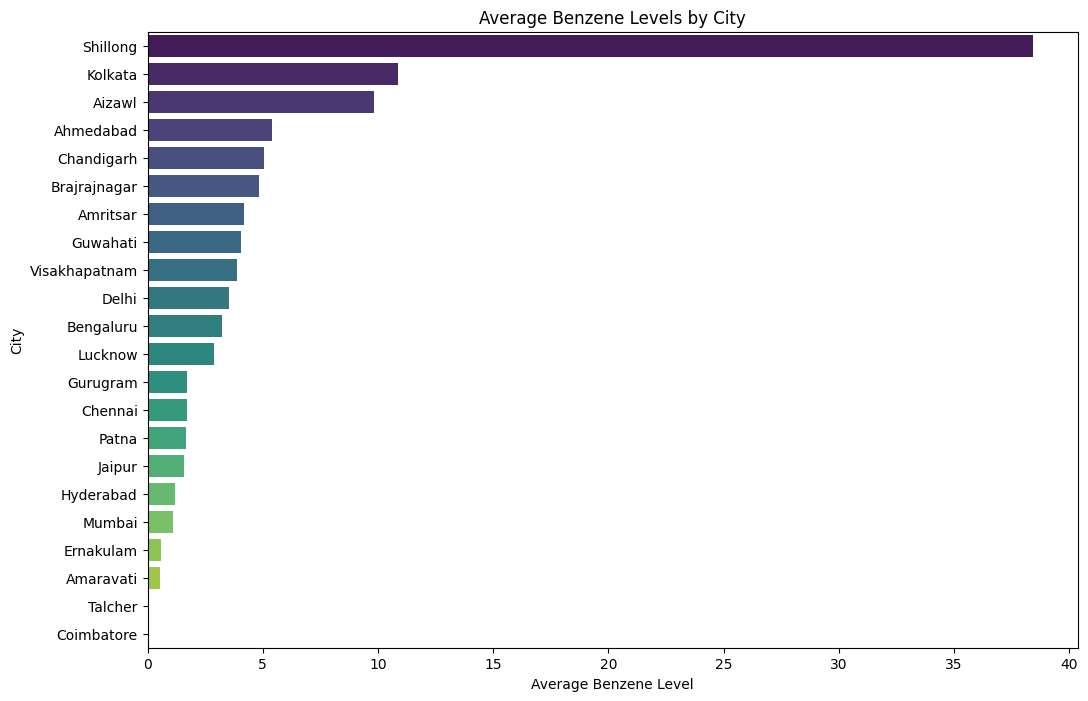

In [13]:
filtered_data = df.dropna(subset=['City', 'Benzene'])

# Calculate average Benzene levels by City
avg_benzene_by_city = filtered_data.groupby('City')['Benzene'].mean().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_benzene_by_city.values, y=avg_benzene_by_city.index, palette='viridis')

# Adding labels and title
plt.xlabel('Average Benzene Level')
plt.ylabel('City')
plt.title('Average Benzene Levels by City')
plt.show()

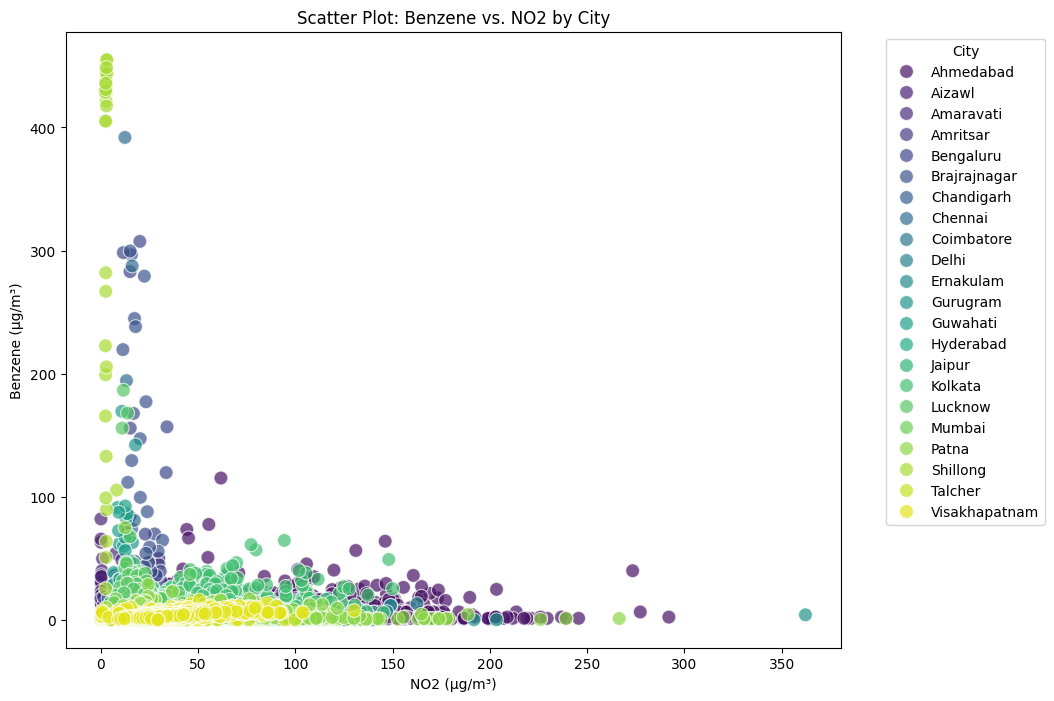

In [14]:
filtered_data = df.dropna(subset=['City', 'Benzene', 'NO2'])

# Plotting the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='NO2', y='Benzene', data=filtered_data, hue='City', palette='viridis', alpha=0.7, s=100)

# Adding labels and title
plt.xlabel('NO2 (µg/m³)')
plt.ylabel('Benzene (µg/m³)')
plt.title('Scatter Plot: Benzene vs. NO2 by City')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

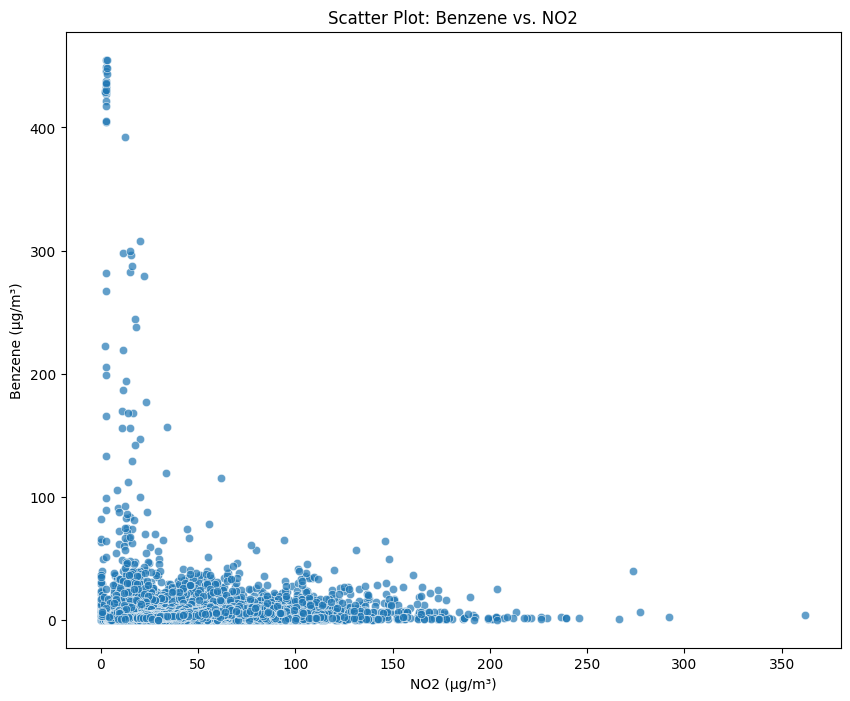

In [15]:
filtered_data = df.dropna(subset=['Benzene', 'NO2'])

# Create a scatter plot of Benzene vs. NO2
plt.figure(figsize=(10, 8))
sns.scatterplot(x='NO2', y='Benzene', data=filtered_data, alpha=0.7)
plt.title('Scatter Plot: Benzene vs. NO2')
plt.xlabel('NO2 (µg/m³)')
plt.ylabel('Benzene (µg/m³)')
plt.show()

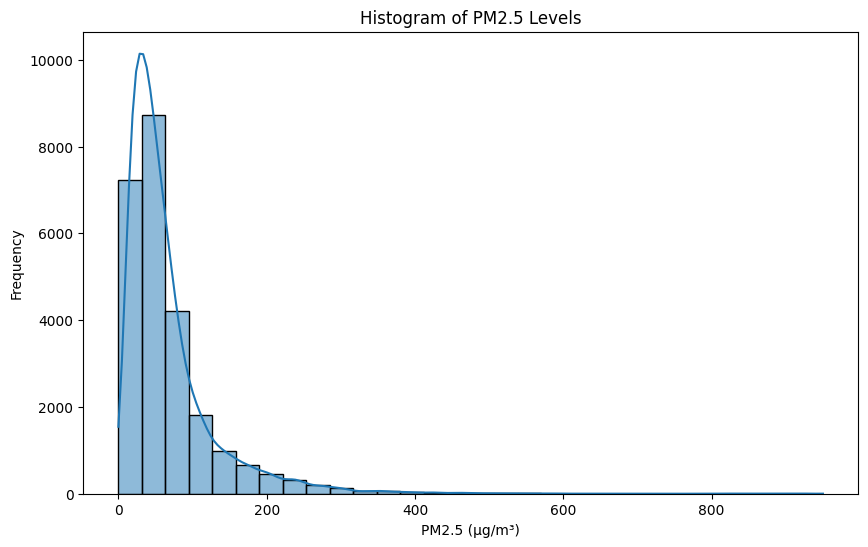

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PM2.5'].dropna(), bins=30, kde=True)
plt.title('Histogram of PM2.5 Levels')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

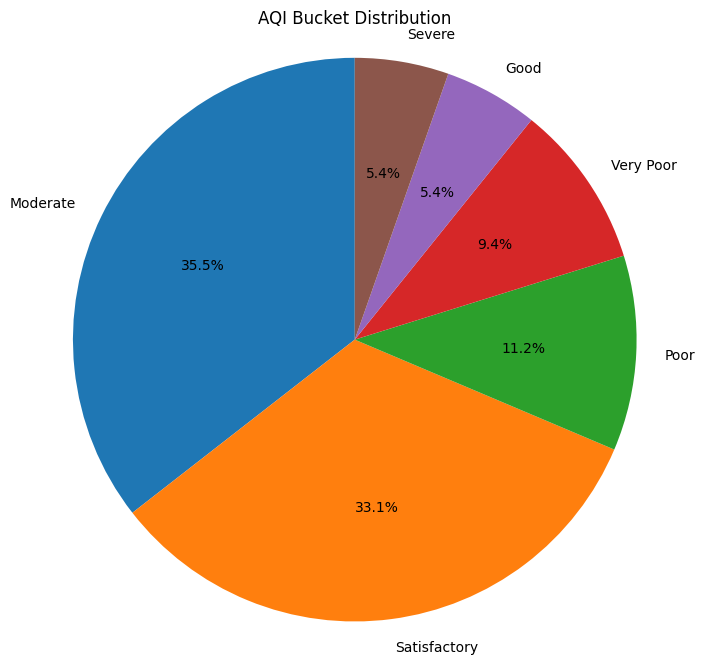

In [17]:
aqi_bucket_counts = df['AQI_Bucket'].value_counts()

# Plotting a pie chart for AQI Bucket distribution
plt.figure(figsize=(8, 8))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('AQI Bucket Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()